## f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

##### - Определить корни
##### - Найти интервалы, на которых функция возрастает
##### - Найти интервалы, на которых функция убывает
##### - Построить график
##### - Вычислить вершину
##### - Определить промежутки, на котором f > 0
##### - Определить промежутки, на котором f < 0

In [1]:
import  numpy as np
import  matplotlib.pyplot as plt

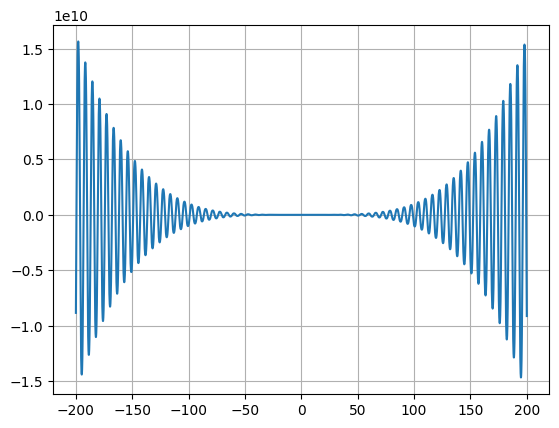

In [2]:
a, b, c, d, e = -12, -18, 5, 10, -30


def func(x):
    return a * x ** 4 * np.sin(np.cos(x)) + b * x ** 3 + c * x ** 2 + d * x + e


limit = 200
step = 0.0001
x = np.arange(-limit, limit, step)
plt.plot(x, func(x), step)
plt.grid()
plt.show()

## Решение: так как уравнение бесконечно  взяли отрезок от -3 до 3

In [3]:
limit = 3
step = 0.00001
x = np.arange(-limit, limit, step)

min_y = min(func(x))

In [4]:
x_down = np.arange(-limit, -1.33895 + step, step)
x_down_m_zero = np.arange(-1.33896, -0.394 + step, step)
x_up_zero = np.arange(-0.394, 0.45510 + step, step)
x_down_p_zero = np.arange(0.45510, 1.7006 + step, step)
x_up_p_zero = np.arange(1.7006,  2.27 + step, step)
x_up = np.arange(2.27, limit  + step, step)

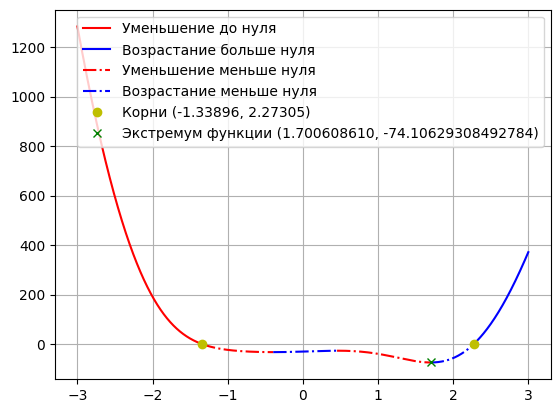

In [5]:
plt.rcParams['lines.linestyle'] = '-'
plt.plot(x_down, func(x_down), 'r', label='Уменьшение до нуля')
plt.plot(x_up, func(x_up), 'b', label='Возрастание больше нуля')

plt.rcParams['lines.linestyle'] = '-.'
plt.plot(x_down_m_zero, func(x_down_m_zero), 'r', label='Уменьшение меньше нуля')
plt.plot(x_up_zero, func(x_up_zero), 'b', label='Возрастание меньше нуля')
plt.plot(x_down_p_zero, func(x_down_p_zero), 'r')
plt.plot(x_up_p_zero, func(x_up_p_zero), 'b')

plt.plot(-1.3389666389, 0, 'yo', label=f'Корни (-1.33896, 2.27305)')
plt.plot(2.2730568449, 0, 'yo')
plt.plot(1.700608610, min_y, 'gx', label=f'Экстремум функции (1.700608610, {min_y})')
plt.legend()
plt.grid()
plt.show()

In [6]:
color = 'b'
line_s = '-'
direct_up = True

def switch_color():
    global color
    if color == 'b':
        color = 'r'
    else:
        color = 'b'
    return color

def switch_line():
    global line_s
    if line_s == '-':
        line_s = '--'
    else:
        line_s = '-'
    return line_s

In [7]:
x_change = [(-limit, 'limit')]

for i in range(len(x) - 1):
    if (func(x[i]) > 0 > func(x[i + 1])) or (func(x[i]) < 0 < func(x[i + 1])):
        x_a = np.arange(x[i], x[i+1], 0.0000001)
        for j in range(len(x_a) - 1):
            if (func(x_a[j]) > 0 > func(x_a[j + 1])) or (func(x_a[j]) < 0 < func(x_a[j + 1])):
                x_change.append((x_a[j] if abs(0 - x_a[j]) < abs(0 - x_a[j+1]) else x_a[j+1], 'zero'))
    if direct_up:
        if func(x[i]) > func(x[i + 1]):
            x_a = np.arange(x[i], x[i + 1], 0.0000001)
            for j in range(len(x_a) - 1):
                if func(x_a[j]) > func(x_a[j + 1]):
                    x_change.append((x_a[j], 'direct'))
                    direct_up = False
                    break
    else:
        if func(x[i]) < func(x[i + 1]):
            x_a = np.arange(x[i], x[i + 1], 0.0000001)
            for j in range(len(x_a) - 1):
                if func(x_a[j]) < func(x_a[j + 1]):
                    x_change.append((x_a[j], 'direct'))
                    direct_up = True
                    break

x_change.append((limit, 'limit'))

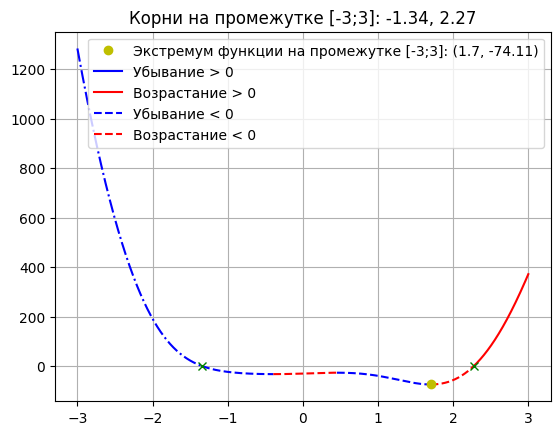

In [8]:
for i in range(len(x_change) - 1):
    cur_x = np.arange(x_change[i][0], x_change[i + 1][0] + step, step)
    if x_change[i][1] == 'zero':
        plt.rcParams['lines.linestyle'] = switch_line()
        plt.plot(cur_x, func(cur_x), color)
    else:
        plt.plot(cur_x, func(cur_x), switch_color())

min_y = min(func(x))
min_x = -limit
for x in x_change:
    if x[1] in ['direct', 'limit']:
        if abs(func(x[0]) - min_y) < abs(min_x - min_y):
            min_x = x[0]

roots = []
for x in x_change:
    if x[1] == 'zero':
        roots.append(str(round(x[0], 2)))
        plt.plot(x[0], func(x[0]), 'gx')
        
plt.plot(min_x, min_y, 'yo', label=f'Экстремум функции на промежутке [{-limit};{limit}]: ({round(min_x, 2)}, {round(min_y, 2)})')
plt.rcParams['lines.linestyle'] = '-'
plt.plot(0, 0, 'b', label='Убывание > 0')
plt.plot(0, 0, 'r', label='Возрастание > 0')
plt.rcParams['lines.linestyle'] = '--'
plt.plot(0, 0, 'b', label='Убывание < 0')
plt.plot(0, 0, 'r', label='Возрастание < 0')
plt.title(f'Корни на промежутке [{-limit};{limit}]: {", ".join(roots)}')
plt.legend()
plt.grid()
plt.show()